In [2]:
import os
import sys
import json
import nltk

In [3]:
def read_json_from_folder(folder_name):
    """
    Reads all json files from a folder and returns a list of dictionaries
    """
    json_list = []
    for file in os.listdir(folder_name):
        if file.endswith(".json"):
            with open(folder_name + "/" + file) as json_file:
                json_list.append(json.load(json_file))
    return json_list
    


In [4]:
# read json from each folder in parent directory and append to a list
json_list = []
for folder in os.listdir(os.getcwd()):
    if os.path.isdir(folder):
        for file in os.listdir(os.getcwd() + "/" + folder):
            if file.endswith(".json"):
                with open(os.getcwd() + "/" + folder + "/" + file) as json_file:
                    json_list.append(json.load(json_file))


In [5]:
def message(i,j): return json_list[i]['messages'][j]

In [6]:
def check_content(message_dict):
    """
    Checks if the message is a text message
    if content exists return content else return 0
    """
    if 'content' in message_dict.keys():
        return message_dict['content']
    else:
        return 0

In [7]:
message_list = []
for i in range(len(json_list)):
    for j in range(len(json_list[i]['messages'])):
        if check_content(message(i,j)) != 0:
            message_list.append(message(i,j)['content'])

In [8]:
# for every item in meaage list, split into words and append to a list
word_list = []
for i in range(len(message_list)):
    word_list.append(message_list[i].split())
    

In [9]:
# flatten word_list
word_list = [item for sublist in word_list for item in sublist]


In [10]:
len(word_list)

161220

In [11]:

from nltk.corpus import stopwords
nltk.download('stopwords')
updated_word_list = []
for i in range(len(word_list)):
    updated_word_list.append(word_list[i].lower().strip('.,!?;:()[]{}'))

# remove stopwords
stop_words = set(stopwords.words('english'))
updated_word_list = [w for w in updated_word_list if not w in stop_words]





[nltk_data] Downloading package stopwords to /home/s/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


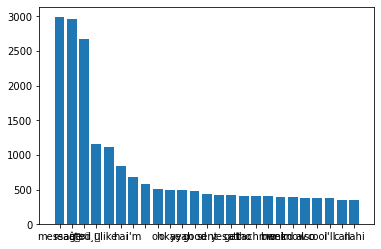

In [24]:
# histogram of most common words vs frequency
import matplotlib.pyplot as plt
import numpy as np
plot = plt.bar(range(25), [x[1] for x in word_count.most_common()[:25]], align='center')
plt.xticks(range(25), [x[0] for x in word_count.most_common()[:25]])
plt.show()




In [27]:
# count nnumber of nouns, verbs, adjectives, adverbs
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

nouns = []
verbs = []
adjectives = []
adverbs = []

s = ' '.join(updated_word_list)
tokens = word_tokenize(s)
tags = pos_tag(tokens)



[nltk_data] Downloading package punkt to /home/s/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/s/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [31]:

for i in range(len(tags)):
    # counts all the nouns
    if tags[i][1] == 'NN' or tags[i][1] == 'NNP' or tags[i][1] == 'NNS':
        nouns.append(tags[i][0])
    # count all verbs
    if tags[i][1] == 'VB' or tags[i][1] == 'VBD' or tags[i][1] == 'VBG' or tags[i][1] == 'VBN' or tags[i][1] == 'VBP' or tags[i][1] == 'VBZ':
        verbs.append(tags[i][0])
    # count all adjectives
    if tags[i][1] == 'JJ' or tags[i][1] == 'JJR' or tags[i][1] == 'JJS':
        adjectives.append(tags[i][0])
    # count all adverbs
    if tags[i][1] == 'RB' or tags[i][1] == 'RBR' or tags[i][1] == 'RBS':
        adverbs.append(tags[i][0])
        

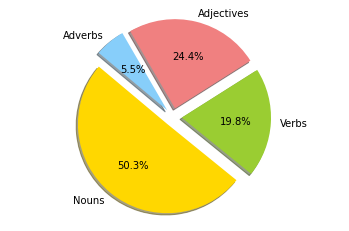

In [38]:
len(set(nouns)), len(set(verbs)), len(set(adjectives)), len(set(adverbs))
# plot a pie chart of these counts

labels = 'Nouns', 'Verbs', 'Adjectives', 'Adverbs'
sizes = [len(set(nouns)), len(set(verbs)), len(set(adjectives)), len(set(adverbs))]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice
plot = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


In [44]:
# perform nltk sentiment analysis on the message
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


In [47]:
# vizualize sid.polarity_scores(message(0,0))
s = ' '.join(updated_word_list)
o = sid.polarity_scores(s)


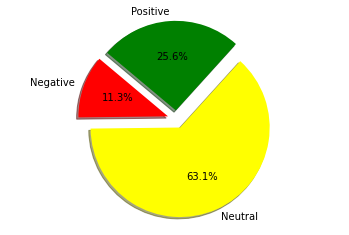

In [63]:
# make a pie chart of the polarity scores
labels = ['Negative', 'Neutral', 'Positive']
sizes = [o['neg'], o['neu'], o['pos']]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0.1, 0.1)  # explode 1st slice
plot = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()
